# Time series forecasting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


C:\Users\abc\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Import time series data: Airline passenger traffic

In [3]:
data = pd.read_csv('airline-passenger-traffic.csv', header = None)
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head(12)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


# Time series analysis

<AxesSubplot:xlabel='Month'>

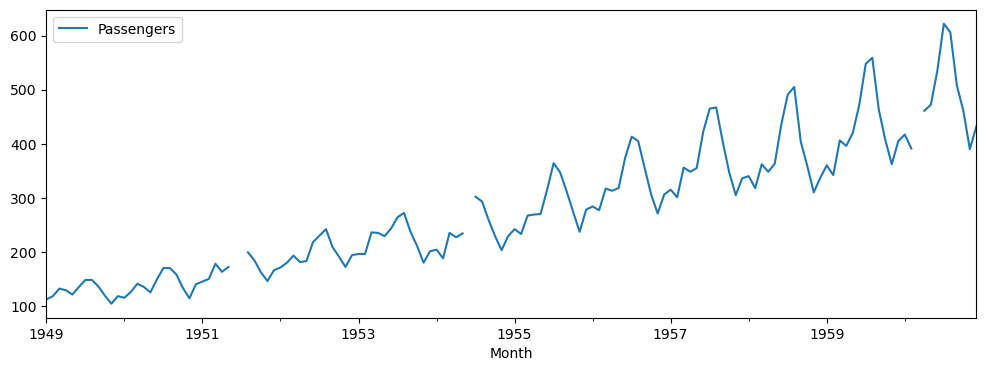

In [4]:
data.plot(figsize=(12,4))

## Missing value treatment

### Mean imputation

<AxesSubplot:xlabel='Month'>

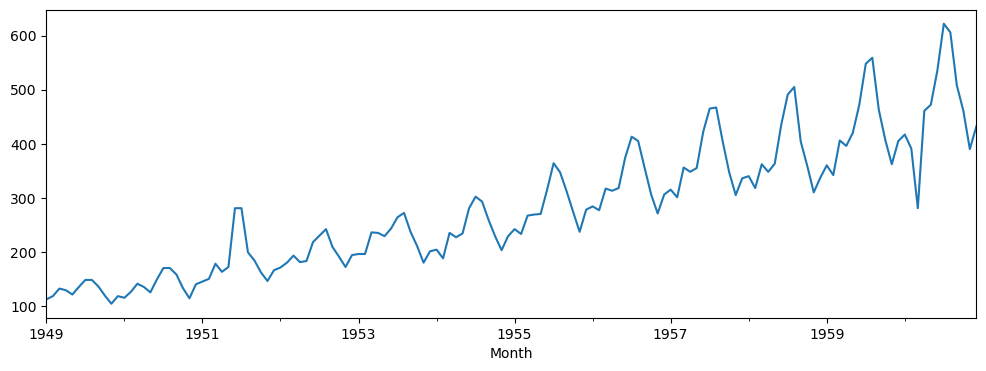

In [5]:
data = data.assign(Passengers_Mean_imputation = data['Passengers'].fillna(data['Passengers'].mean()))
data['Passengers_Mean_imputation'].plot(figsize=(12,4))


1952 takes higher values than expected.
1960 takes lower value than expected

### Linear interpolation

In [6]:
data = data.assign(Passengers_Linear_Interpolation = data['Passengers'].interpolate(method='linear'))
data.head()

,Passengers,Passengers_Mean_imputation,Passengers_Linear_Interpolation
Month,,,
1949-01-01,112.0,112.0,112.0
1949-02-01,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0


<AxesSubplot:xlabel='Month'>

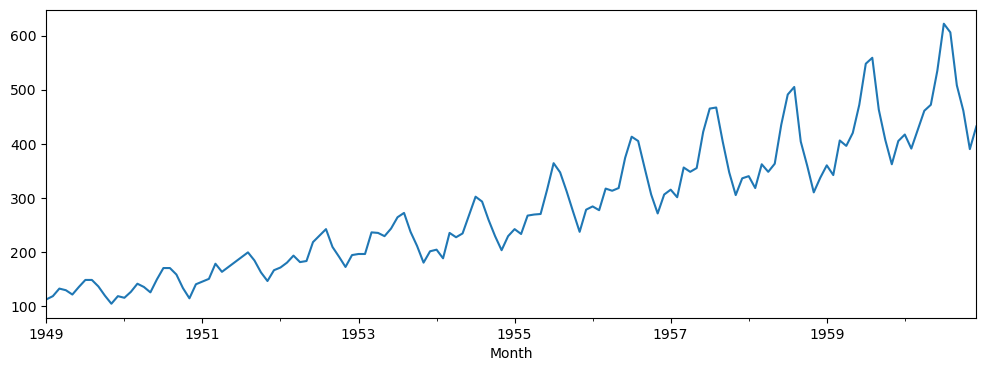

In [7]:
data['Passengers_Linear_Interpolation'].plot(figsize=(12,4))

### Use linear interpolation to impute missing values

## Outlier detection

### Box plot and interquartile range

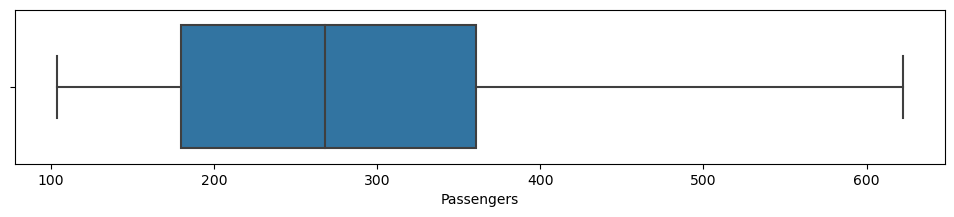

In [8]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(data['Passengers'], whis=1.5)

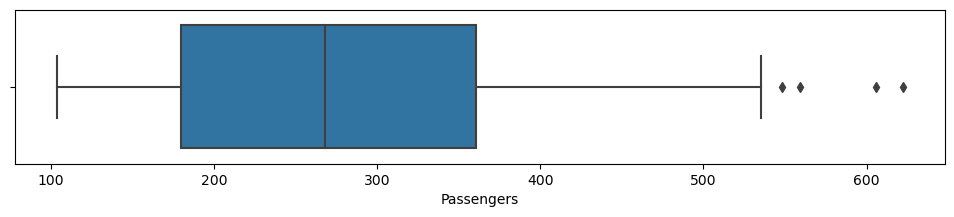

In [9]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(data['Passengers'], whis=1)

### Histogram plot

<AxesSubplot:>

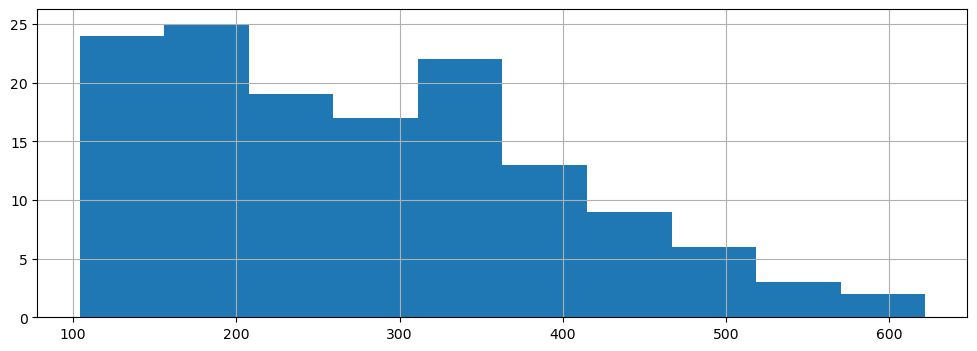

In [10]:
data['Passengers'].hist(figsize=(12,4))

In [11]:
data.head()

,Passengers,Passengers_Mean_imputation,Passengers_Linear_Interpolation
Month,,,
1949-01-01,112.0,112.0,112.0
1949-02-01,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0


In [12]:
data = data.drop(['Passengers', 'Passengers_Mean_imputation'], axis=1)
data.rename(columns={'Passengers_Linear_Interpolation' : 'Passengers'}, inplace=True)
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


## Time series Decomposition

### Additive seasonal decomposition

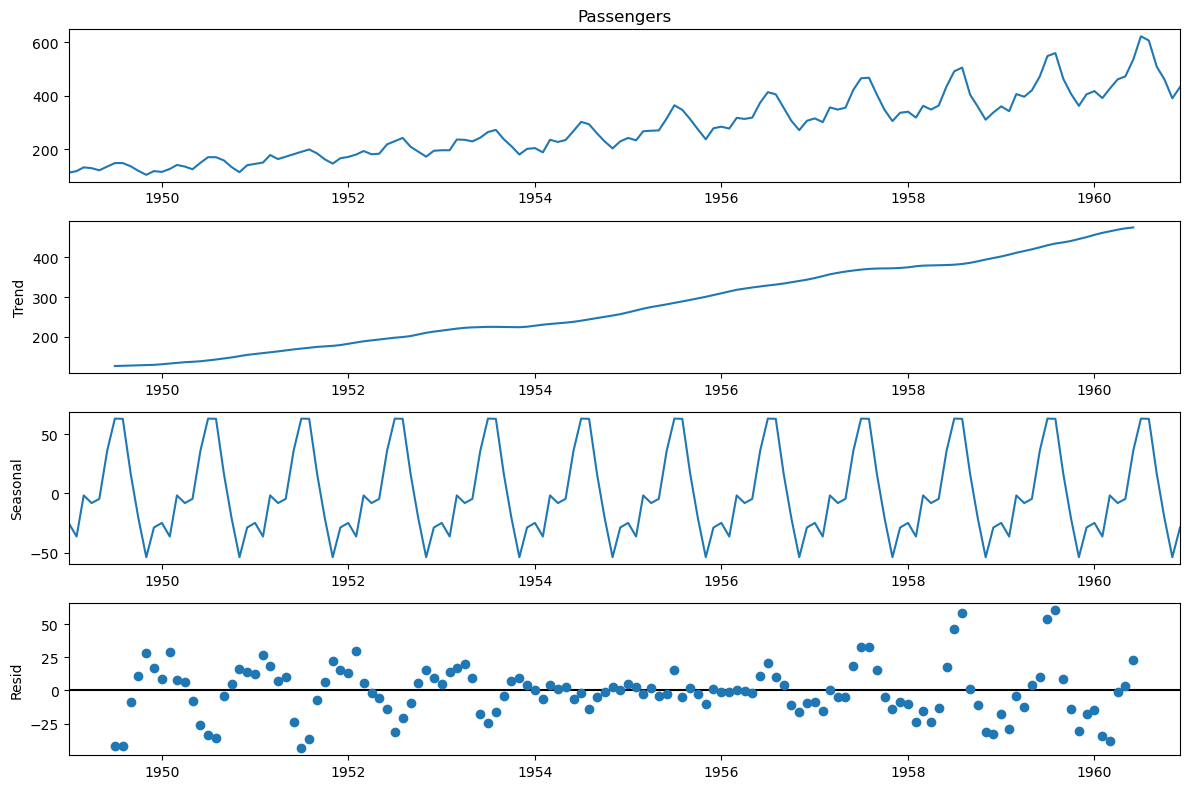

In [13]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data['Passengers'], model='additive')
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition

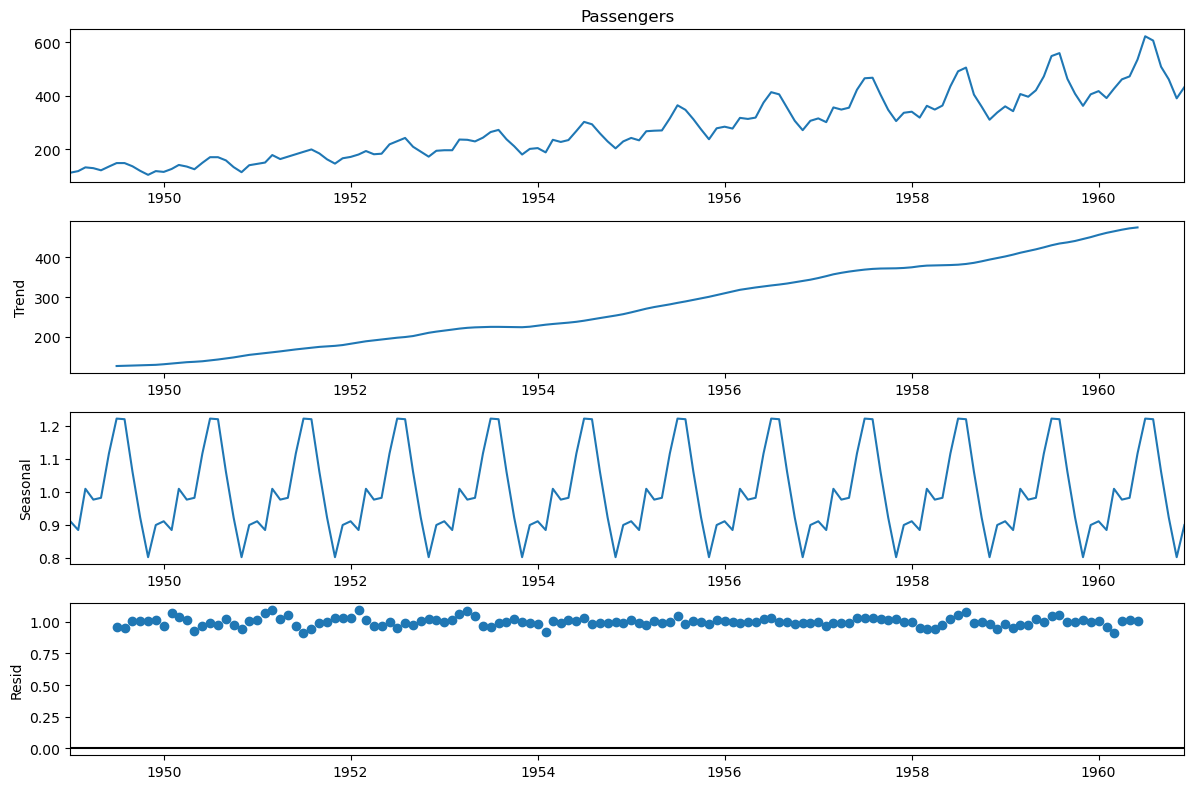

In [14]:
decomposition = sm.tsa.seasonal_decompose(data['Passengers'], model='multiplicative')
fig = decomposition.plot()
plt.show()

# Build and evaluate time series forecast

## Split time series data into training and test set

In [15]:
train_len = 120
train = data[0:train_len]
# 1959 and 1960 data
test = data[train_len:]
train.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [16]:
test.head()

,Passengers
Month,
1959-01-01,360.0
1959-02-01,342.0
1959-03-01,406.0
1959-04-01,396.0
1959-05-01,420.0


# Simple time series methods

## Naive method

In [17]:
y_hat_naive = test.copy()
y_hat_naive.head()

,Passengers
Month,
1959-01-01,360.0
1959-02-01,342.0
1959-03-01,406.0
1959-04-01,396.0
1959-05-01,420.0


In [18]:
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]
y_hat_naive.head()

,Passengers,naive_forecast
Month,,
1959-01-01,360.0,337.0
1959-02-01,342.0,337.0
1959-03-01,406.0,337.0
1959-04-01,396.0,337.0
1959-05-01,420.0,337.0


### Plot 

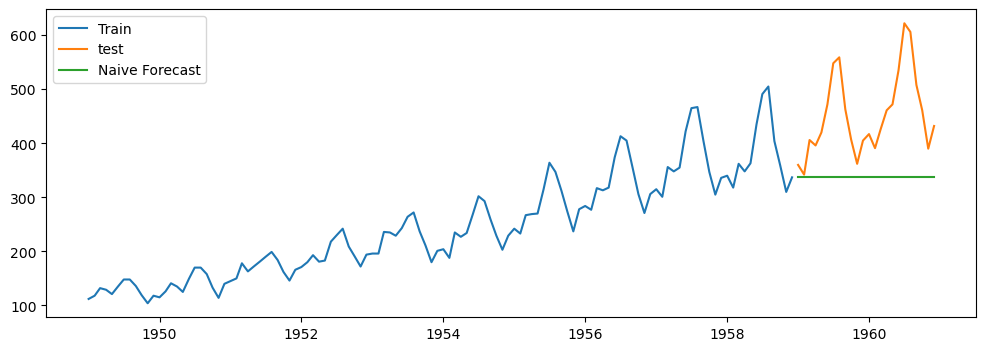

In [19]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()

## Simple average method

In [31]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()
y_hat_avg.head()

,Passengers,avg_forecast
Month,,
1959-01-01,360.0,245.891667
1959-02-01,342.0,245.891667
1959-03-01,406.0,245.891667
1959-04-01,396.0,245.891667
1959-05-01,420.0,245.891667


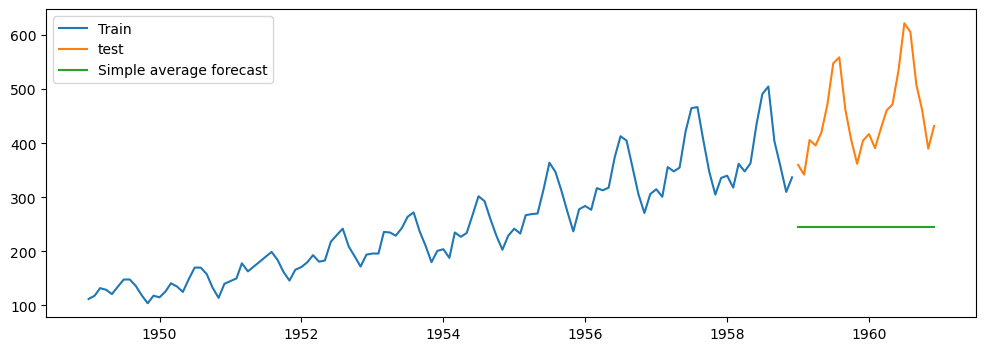

In [32]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.show()

### Plot 

### Calculate RMSE and MAPE

For Naive method


In [33]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
rmse

137.51

In [34]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_naive['naive_forecast'])/test['Passengers'])*100),2)
mape

23.63

For Simple average method

In [35]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
rmse


219.69

In [36]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_avg['avg_forecast'])/test['Passengers'])*100),2)
mape

44.28

In [37]:
results = pd.DataFrame({'Method':['Naive method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = results.append({'Method':'Simple average method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,219.69,44.28
1,Simple average method,219.69,44.28


## Simple moving average method

In [38]:
y_hat_sma = data.copy()
# Moving average window. We will take the avg of last 12 months for forecasting the future. 
ma_window = 12
# Rolling function calculated the last number of records
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()

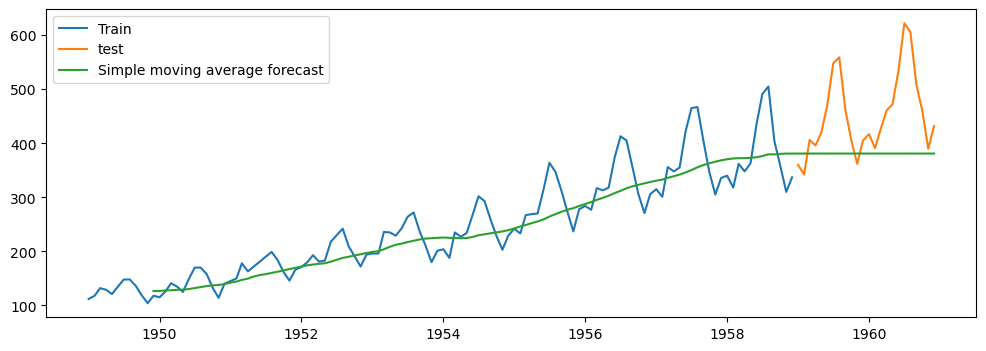

In [39]:
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

### Calculate RMSE and MAPE

In [40]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
rmse


103.33

In [41]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100),2)
mape

15.54

In [42]:
results = results.append({'Method':'Simple moving average method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,219.69,44.28
1,Simple average method,219.69,44.28
2,Simple moving average method,103.33,15.54


# Auto Regressive methods

## Stationarity vs non-stationary time series

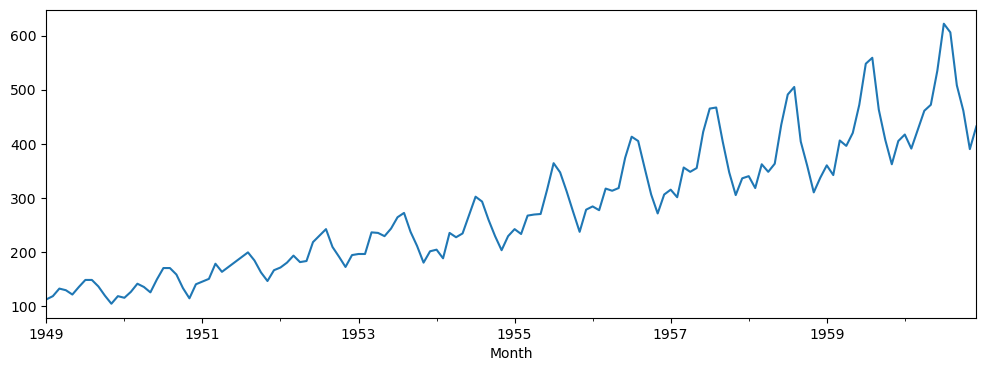

In [43]:
data['Passengers'].plot(figsize=(12,4))
plt.show()

### Augmented Dickey-Fuller (ADF) test

In [44]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Passengers'])
adf_test

(0.8946087940823831,
 0.9930195647605924,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 993.7736365973918)

In [45]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: 0.894609
p-value: 0.993020
Critical value @ 0.05: -2.88


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [46]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Passengers'])

print('KPSS stats: %f' % kpss_test[0])
print('p-value: %f' %kpss_test[1])
print('Critical value @ 0.05: %.2f' % kpss_test[3]['5%'])

KPSS stats: 1.651190
p-value: 0.010000
Critical value @ 0.05: 0.46


C:\Users\abc\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [47]:
print('KPSS stats: %f' % kpss_test[0])
print('p-value: %f' %kpss_test[1])
print('Critical value @ 0.05: %.2f' % kpss_test[3]['5%'])

KPSS stats: 1.651190
p-value: 0.010000
Critical value @ 0.05: 0.46


Hence,  the time series is *non stationary*.

### Box Cox transformation to make variance constant

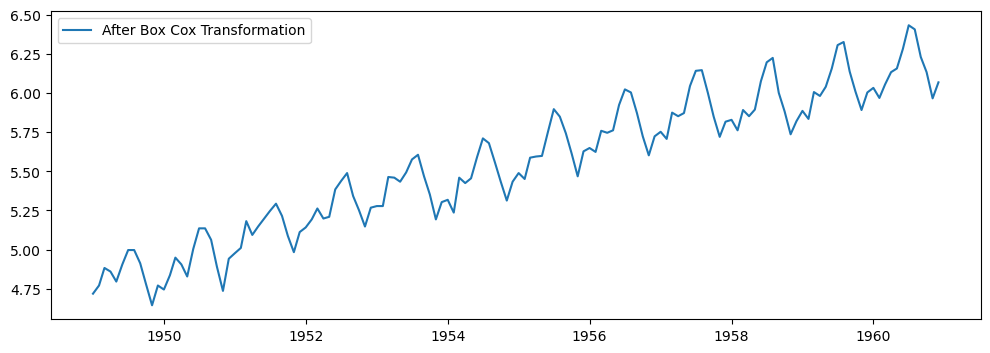

In [48]:
from scipy.stats import boxcox
# Creating a new dataset with the boxcox
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda=0), data.index)
data_boxcox.head()
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox Transformation')
plt.legend(loc='best')
plt.show()

### Differencing to remove trend

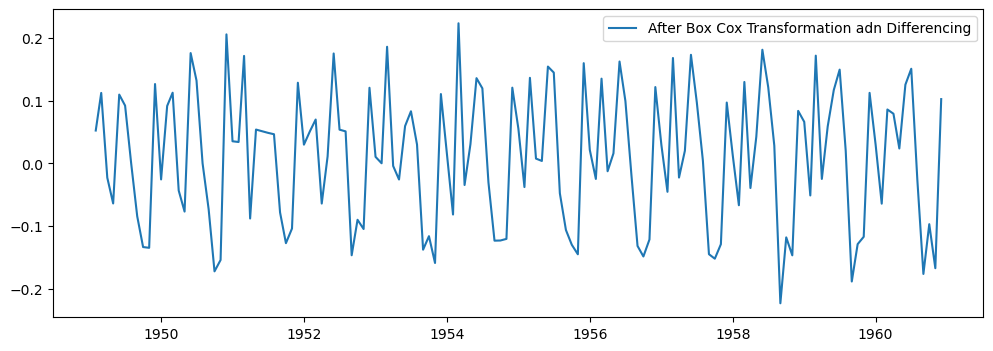

In [49]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index=data.index)

data_boxcox_diff.dropna(inplace=True)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation adn Differencing')
plt.legend(loc='best')
plt.show()

### Augmented Dickey-Fuller (ADF) test

In [50]:
adf_test = adfuller(data_boxcox_diff)
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: -3.290114
p-value: 0.015326
Critical value @ 0.05: -2.88


The series is *Stationary*.

## Autocorrelation function (ACF)

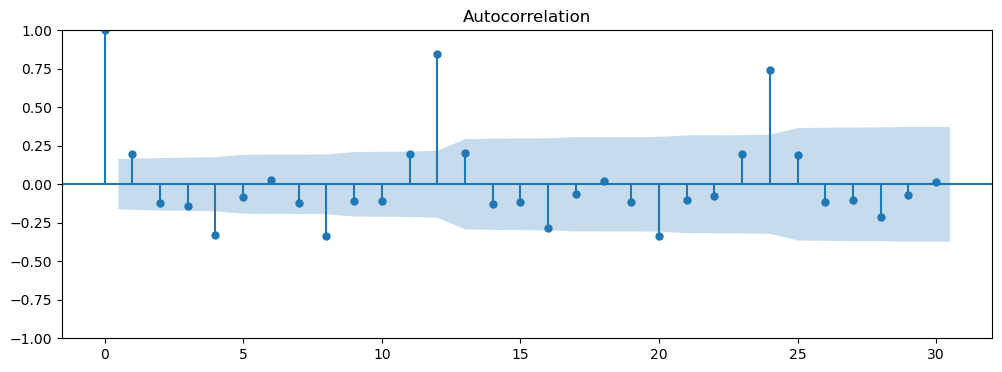

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

## Partial autocorrelation function (PACF)

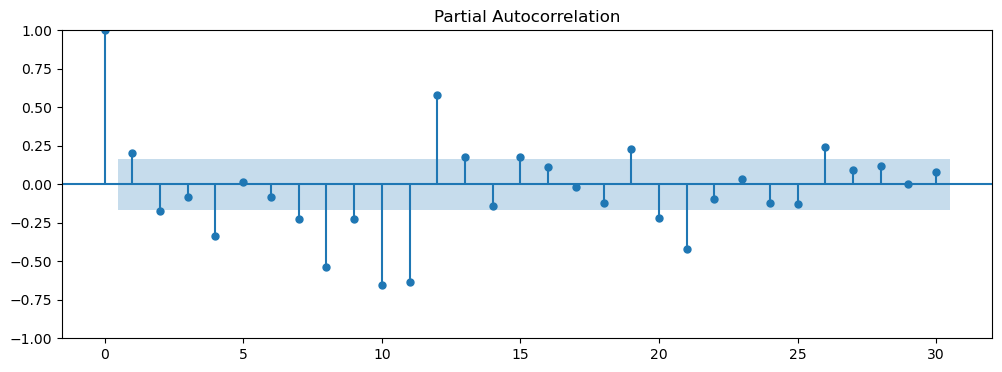

In [52]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

In [55]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

## Auto regressive method (AR)

In [56]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


In [57]:
model = ARIMA(train_data_boxcox_diff, order=(1,0,0))
model_fit = model.fit()
model_fit.params

C:\Users\abc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\abc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\abc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const     0.009473
ar.L1     0.183106
sigma2    0.010680
dtype: float64

In [58]:
y_hat_ar = data_boxcox_diff.copy()
# We are predicting for all the observations train and test set both just to visualise the regression line
# The index column represents the timestamp. So, we are taking all the timestamps from first(index.min) to last(index.max)
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

### Recover original time series

In [59]:
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()

y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])

y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot 

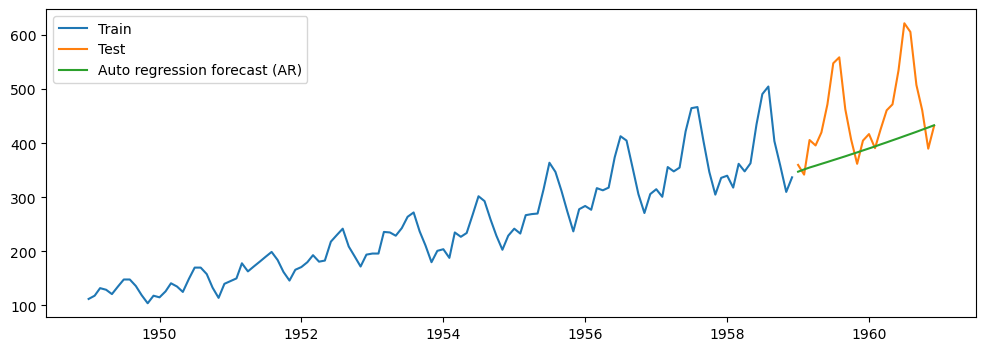

In [60]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

### Calculate RMSE and MAPE

In [61]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
rmse

93.49

In [62]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_ar['ar_forecast'][test.index.min():])/test['Passengers'])*100),2)
mape

13.78

In [63]:
results = results.append({'Method':'Auto regressive (AR) method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,219.69,44.28
1,Simple average method,219.69,44.28
2,Simple moving average method,103.33,15.54
3,Auto regressive (AR) method,93.49,13.78


## Moving average method (MA)

In [64]:
model = ARIMA(train_data_boxcox_diff, order=(0,0,1))
model_fit = model.fit()
model_fit.params

C:\Users\abc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\abc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\abc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const     0.009533
ma.L1     0.266099
sigma2    0.010515
dtype: float64

In [65]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

### Recover original time series

In [66]:
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
# Adding the first Ovservation
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
# Removing the transformation
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot 

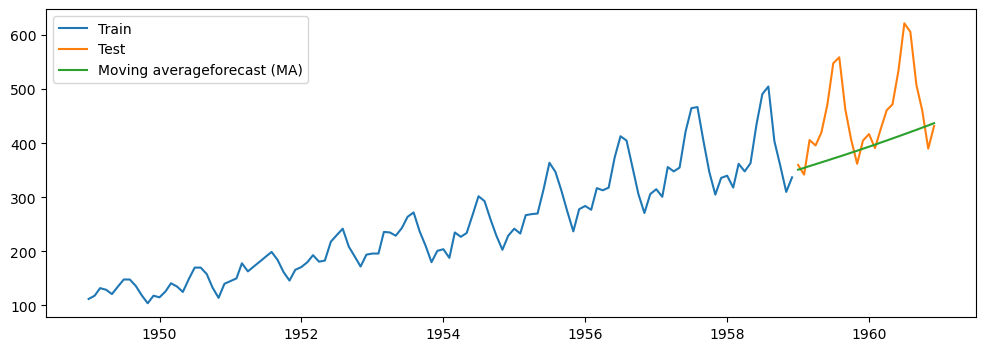

In [67]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving averageforecast (MA)')
plt.legend(loc='best')
plt.show()

### Calculate RMSE and MAPE

In [68]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
rmse

91.35

In [69]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_ma['ma_forecast'][test.index.min():])/test['Passengers'])*100),2)
mape

13.41

In [70]:
results = results.append({'Method':'Moving average (MA) method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,219.69,44.28
1,Simple average method,219.69,44.28
2,Simple moving average method,103.33,15.54
3,Auto regressive (AR) method,93.49,13.78
4,Moving average (MA) method,91.35,13.41


## Auto regression moving average method (ARMA)

In [71]:
model = ARIMA(train_data_boxcox_diff, order=(1,0,1))
model_fit = model.fit()
model_fit.params

C:\Users\abc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\abc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\abc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const     0.009618
ar.L1    -0.527079
ma.L1     0.798271
sigma2    0.010051
dtype: float64

In [72]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
# Reverse the differencing
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
# Reverse the transformation
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

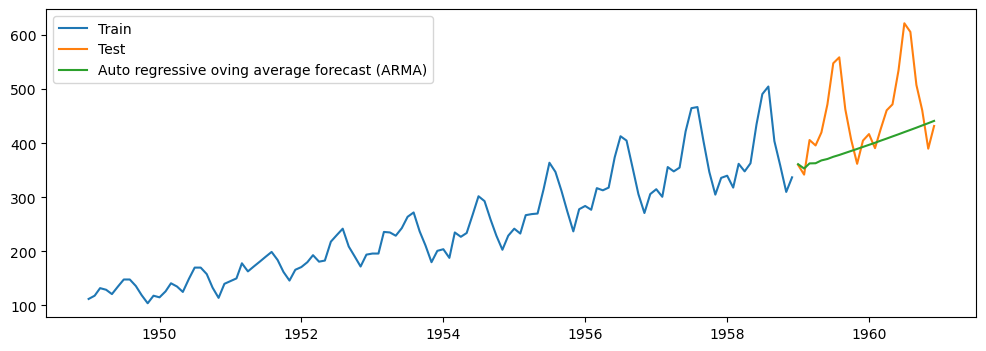

In [73]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='Auto regressive oving average forecast (ARMA)')
plt.legend(loc='best')
plt.show()

### Calculate RMSE and MAPE

In [74]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arma['arma_forecast'][test.index.min():])).round(2)
rmse

89.06

In [75]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_arma['arma_forecast'][test.index.min():])/test['Passengers'])*100),2)
mape

12.91

In [76]:
results = results.append({'Method':'Auto regressive moving average (ARMA) method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,219.69,44.28
1,Simple average method,219.69,44.28
2,Simple moving average method,103.33,15.54
3,Auto regressive (AR) method,93.49,13.78
4,Moving average (MA) method,91.35,13.41
5,Auto regressive moving average (ARMA) method,89.06,12.91
